Variables in datasets don't exist in a vacuum; they have relationships with each other. In this chapter, you'll look at relationships across numerical, categorical, and even DateTime data, exploring the direction and strength of these relationships as well as ways to visualize them.

## Patterns over time

#### Importing DateTime data
You'll now work with the entire divorce dataset! The data describes Mexican marriages dissolved between 2000 and 2015. It contains marriage and divorce dates, education level, birthday, income for each partner, and marriage duration, as well as the number of children the couple had at the time of divorce.<br>
<br>
The column names and data types are as follows:<br>
<br>
divorce_date -----> object<br>
dob_man -----> object<br>
education_man -----> object<br>
income_man -----> float64<br>
dob_woman -----> object<br>
education_woman -----> object<br>
income_woman -----> float64<br>
marriage_date -----> object<br>
marriage_duration -----> float64<br>
num_kids -----> float64<br>
It looks like there is a lot of date information in this data that is not yet a DateTime data type! Your task is to fix that so that you can explore patterns over time.<br>
<br>
pandas has been imported as pd.

In [4]:
import pandas as pd

# Import divorce.csv, parsing the appropriate columns as dates in the import
divorce = pd.read_csv('divorce.csv', parse_dates =['divorce_date','dob_man','dob_woman'])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date                object
marriage_duration           float64
num_kids                    float64
dtype: object


Bingo! Nice work parsing those dates at the same time as you imported the data into pandas. Next, have a go at updating DateTime data types in a DataFrame that has already been imported!

#### Updating data type to DateTime
Now, the divorce DataFrame has been loaded for you, but one column is stored as a string that should be DateTime data. Which one is it? Once you've identified the column, you'll update it so that you can explore it more closely in the next exercise.

pandas has been imported as pd.

In [6]:
# Convert the marriage_date column to DateTime values
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])
divorce.dtypes

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

Nailed it! Now, you're set up to look at how a couple's marriage date is related to other data.

#### Visualizing relationships over time
Now that your date data is saved as DateTime data, you can explore patterns over time! Does the year that a couple got married have a relationship with the number of children that the couple has at the time of divorce? Your task is to find out!

The divorce DataFrame (with all dates formatted as DateTime data types) has been loaded for you. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns.

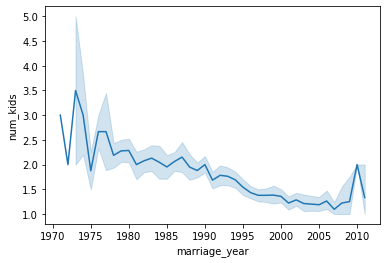

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the marriage_year column
divorce["marriage_year"] = divorce["marriage_date"].dt.year

# Create a line plot showing the average number of kids by year
sns.lineplot(x = divorce["marriage_year"], y = divorce['num_kids'], data = divorce)
plt.show()

Nice! You've discovered a pattern here: it looks like couples who had later marriage years also had fewer children during their marriage. We'll explore this relationship and others further in the next video.

## Correlation

#### Interpreting a heatmap
Which of the below statements is correct regarding the relationships between variables in the divorce DataFrame?

The divorce DataFrame has been loaded for you so that you can explore it in the shell. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns.

In [15]:
# Define the marriage_year column
divorce["marriage_month"] = divorce["marriage_date"].dt.month

a.marriage_duration is strongly positively correlated with marriage_month.<br>
b.The correlation between num_kids and income_man is stronger than the correlation between num_kids and marriage_duration.<br>
c.A later marriage_year causes a lower number of children, represented by num_kids.<br>
<strong>d.A later marriage_year is correlated with having fewer children.</strong>

In [16]:
divorce.corr()

,income_man,income_woman,marriage_duration,num_kids,marriage_year,marriage_month
income_man,1.000000,0.318047,0.085321,0.040848,0.019170,0.013652
income_woman,0.318047,1.000000,0.078677,-0.018015,0.026433,0.041441
marriage_duration,0.085321,0.078677,1.000000,0.447358,-0.812469,0.001433
num_kids,0.040848,-0.018015,0.447358,1.000000,-0.461495,-0.000551
marriage_year,0.019170,0.026433,-0.812469,-0.461495,1.000000,-0.011456
marriage_month,0.013652,0.041441,0.001433,-0.000551,-0.011456,1.000000


Very well done! It does appear that a later marriage_year is correlated with having fewer children

#### Visualizing variable relationships
In the last exercise, you may have noticed that a longer marriage_duration is correlated with having more children, represented by the num_kids column. The correlation coefficient between the marriage_duration and num_kids variables is 0.45.

In this exercise, you'll create a scatter plot to visualize the relationship between these variables. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns.

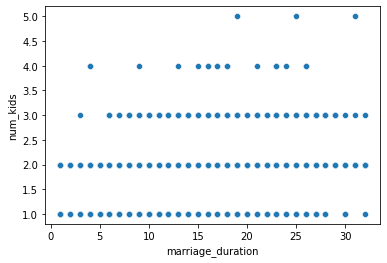

In [17]:
# Create the scatterplot
sns.scatterplot(x = 'marriage_duration', y = 'num_kids', data = divorce)
plt.show()

Bingo! There is a slight positive relationship in your scatterplot. In the dataset, couples with no children have no value in the num_kids column. If you are confident that all or most of the missing values in num_kids are related to couples without children, you could consider updating these values to 0, which might increase the correlation.

#### Visualizing multiple variable relationships
Seaborn's .pairplot() is excellent for understanding the relationships between several or all variables in a dataset by aggregating pairwise scatter plots in one visual.

Your task is to use a pairplot to compare the relationship between marriage_duration and income_woman. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns.

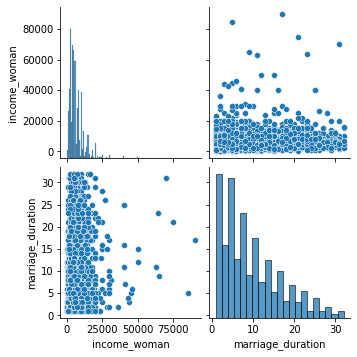

In [18]:
# Create a pairplot for income_woman and marriage_duration
sns.pairplot(data = divorce, vars=['income_woman', 'marriage_duration'])
plt.show()

Well done! Just as in the correlation matrix, you can see that the relationship between income_woman and marriage_duration is not a strong one. You can also get a sense of the distributions of both variables in the upper left and lower right plots.

## Factor relationships and distributions

#### Categorial data in scatter plots
In the video, we explored how men's education and age at marriage related to other variables in our dataset, the divorce DataFrame. Now, you'll take a look at how women's education and age at marriage relate to other variables!

Your task is to create a scatter plot of each woman's age and income, layering in the categorical variable of education level for additional context.

The divorce DataFrame has been loaded for you, and woman_age_marriage has already been defined as a column representing an estimate of the woman's age at the time of marriage. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns.

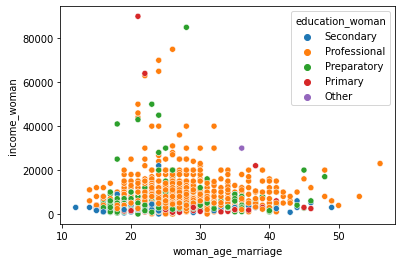

In [20]:
# Create the scatter plot
divorce['woman_age_marriage'] = divorce['marriage_year'] - divorce['dob_woman'].dt.year
sns.scatterplot(x = divorce['woman_age_marriage'], y = divorce['income_woman'], hue = divorce['education_woman'], data = divorce)
plt.show()

Awesome—it looks like there is a positive correlation between professional education and higher salaries, as you might expect. The relationship between women's age at marriage and education level is a little less clear.

#### Exploring with KDE plots
Kernel Density Estimate (KDE) plots are a great alternative to histograms when you want to show multiple distributions in the same visual.

Suppose you are interested in the relationship between marriage duration and the number of kids that a couple has. Since values in the num_kids column range only from one to five, you can plot the KDE for each value on the same plot.

The divorce DataFrame has been loaded for you. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns. Recall that the num_kids column in divorce lists only N/A values for couples with no children, so you'll only be looking at distributions for divorced couples with at least one child.

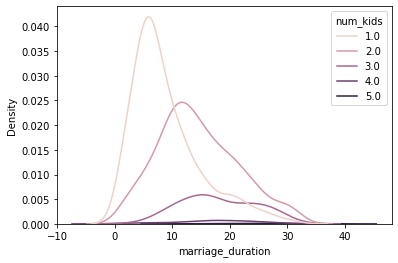

In [21]:
# Create the KDE plot
sns.kdeplot(x = divorce['marriage_duration'], hue = divorce['num_kids'])
plt.show()

Notice that the plot currently shows marriage durations less than zero; update the KDE plot so that marriage duration cannot be smoothed past the extreme data points.

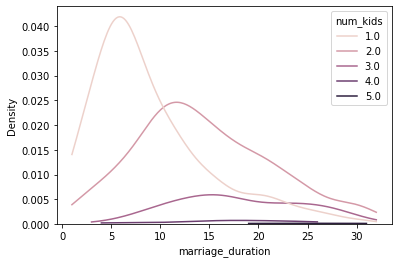

In [22]:
# Update the KDE plot so that marriage duration can't be smoothed too far
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut = 0)
plt.show()

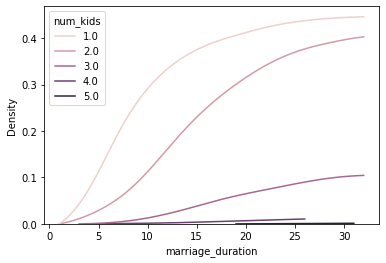

In [24]:
# Update the KDE plot so that marriage duration can't be smoothed too far
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut = 0 , cumulative = True)
plt.show()

Well done! It looks as though there is a positive correlation between longer marriages and more children, but of course, this doesn't indicate causation. You can also see that there is much less data on couples with more than two children; this helps us understand how reliable our findings are.